In [13]:
import numpy as np

class Perceptron(object):
    # Constructor to initialize the perceptron
    # learning_rate: How fast the model should learn
    # n_iters: Number of passes over the training dataset
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func # Activation function (step function)
        self.weights = None # Weights for the inputs will be initialized during fit
        self.bias = None # Bias term, also initialized during fit

    # Method to train the perceptron
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros initially
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert target values to 0 or 1
        y_ = np.array([1 if i > 0 else 0 for i in y])

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    # Prediction method
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # Activation function: step function
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)


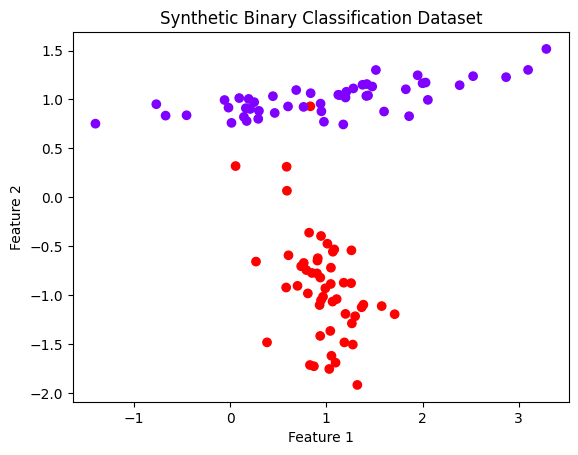

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Split dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [15]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

In [16]:
predictions = p.predict(X_test)

# Calculate accuracy as the proportion of correctly predicted instances
accuracy = np.mean(predictions == y_test)
print(f"Perceptron classification accuracy: {accuracy * 100:.2f}%")

Perceptron classification accuracy: 95.00%


#Perceptron with Decision Boundary

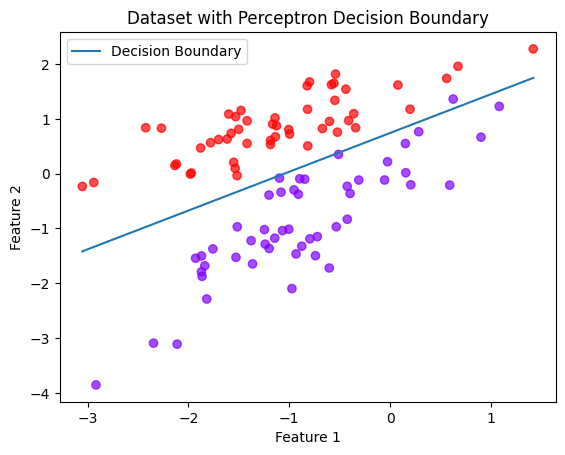

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0)

# Train-test split for demonstration purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Simple perceptron model for demonstration
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Plotting the dataset and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', alpha=0.7)

# Calculate the decision boundary (line)
x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(perceptron.bias + np.dot(perceptron.weights[0], x_values)) / perceptron.weights[1]

plt.plot(x_values, y_values, label="Decision Boundary")
plt.title('Dataset with Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
